<a href="https://colab.research.google.com/github/fly2ramkumar/machinelearning/blob/main/Loigistic_regression_titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [2]:
import pandas as pd
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


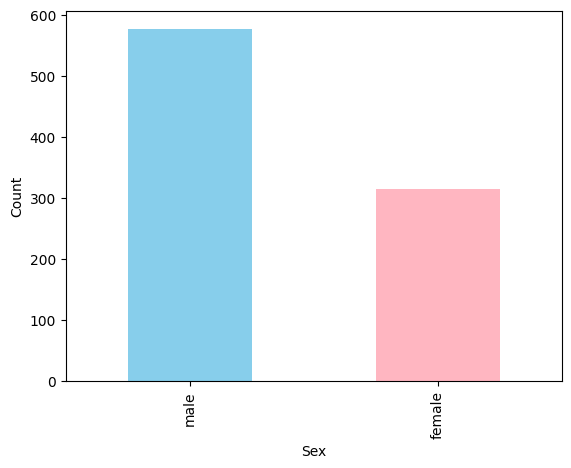

In [10]:
import matplotlib.pyplot as plt

df['Sex'].value_counts().plot(kind='bar', color=['skyblue', 'lightpink'])

plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

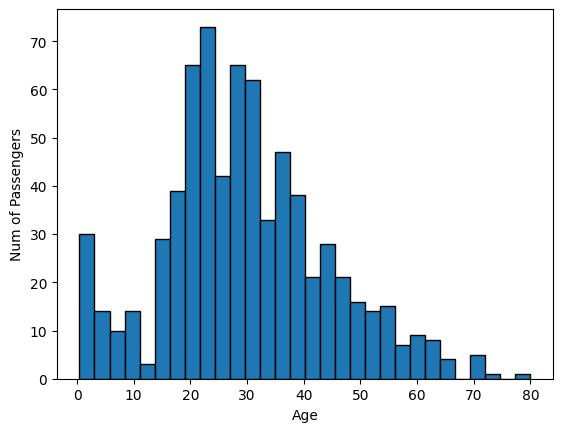

In [12]:
df['Age'].hist(bins=30, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Num of Passengers')
plt.grid(False)
plt.show()

In [13]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [14]:
df = df.drop('Cabin', axis=1)

In [15]:
df = df.dropna()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [18]:
df[['Survived','Sex']].value_counts().reset_index()

,Survived,Sex,count
0,0,male,468
1,1,female,231
2,1,male,109
3,0,female,81


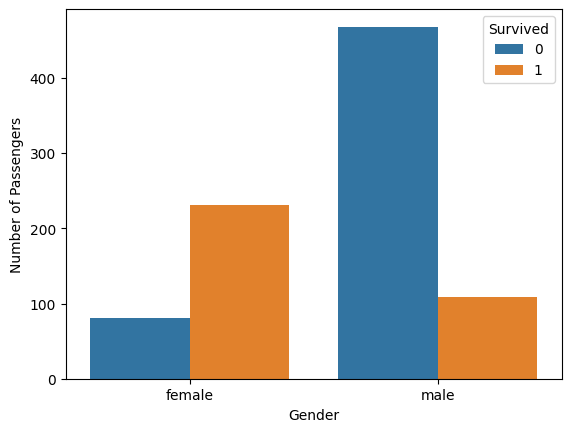

In [19]:
survival_counts = df.groupby(['Sex', 'Survived']).size().reset_index(name = 'Count')

import seaborn as sns

sns.barplot(data=survival_counts, x='Sex', y='Count', hue='Survived')
plt.ylabel('Number of Passengers')
plt.xlabel('Gender')
plt.legend(title='Survived')
plt.show()

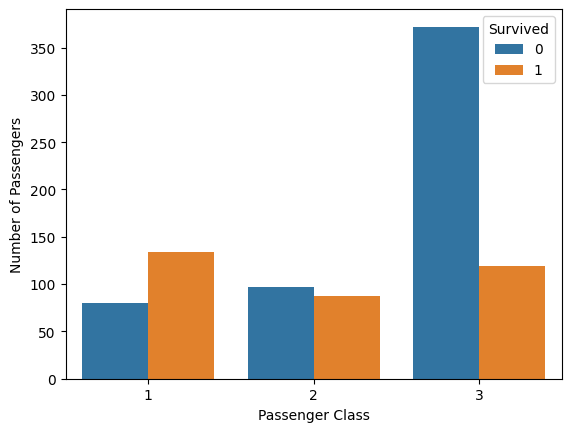

In [20]:
pclass_data = df[['Survived', 'Pclass']].value_counts().reset_index(name='Count')

sns.barplot(data=pclass_data, x='Pclass', y='Count', hue='Survived')

plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived')
plt.show()


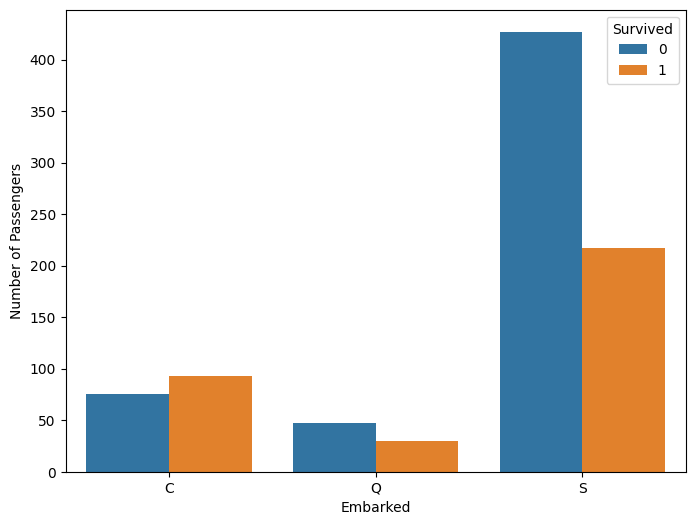

In [21]:
embarked_counts = df.groupby(['Survived', 'Embarked']).size().reset_index(name='Count')

# Direct barplot
plt.figure(figsize=(8,6))
sns.barplot(data=embarked_counts, x='Embarked', y='Count', hue='Survived')

plt.ylabel('Number of Passengers')
plt.xlabel('Embarked')
plt.legend(title='Survived')
plt.xticks(rotation=0)
plt.show()

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [24]:
family_survival = df.groupby('FamilySize')['Survived'].mean().reset_index()

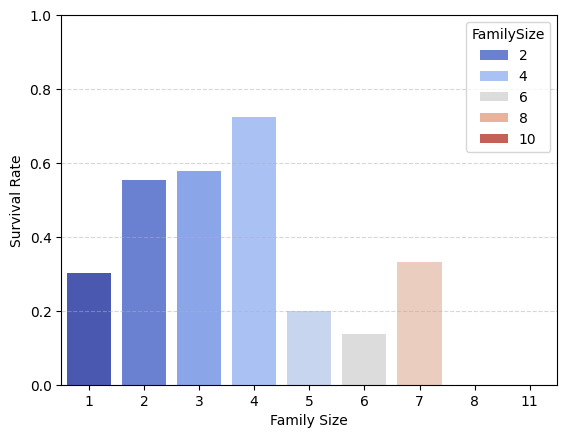

In [25]:
sns.barplot(data=family_survival, x='FamilySize', y='Survived', hue='FamilySize', palette='coolwarm', dodge=False)

plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [27]:
df = df.drop(['Name', 'PassengerId', 'Ticket', 'SibSp', 'Parch'], axis=1)

In [28]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [29]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [30]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [31]:
df.head()

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,True,False,True
1,1,1,38.0,71.2833,2,False,False,False
2,1,3,26.0,7.9250,1,False,False,True
3,1,1,35.0,53.1000,2,False,False,True
4,0,3,35.0,8.0500,1,True,False,True


In [32]:
x=df.drop('Survived', axis=1)
y=df['Survived']

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [34]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [35]:
model.fit(x_train, y_train)

LogisticRegression()

In [36]:
y_pred = model.predict(x_test)

In [38]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index=["Actual 0", "Actual 1"],
                     columns=["Predicted 0", "Predicted 1"])
cm_df

,Predicted 0,Predicted 1
Actual 0,91,14
Actual 1,16,57


In [39]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()
report_df


,precision,recall,f1-score,support
0,0.850467,0.866667,0.858491,105.000000
1,0.802817,0.780822,0.791667,73.000000
accuracy,0.831461,0.831461,0.831461,0.831461
macro avg,0.826642,0.823744,0.825079,178.000000
weighted avg,0.830925,0.831461,0.831085,178.000000
